# Catalogue paper for the second half of O3

- GWTC-3: Compact Binary Coalescences Observed by LIGO and Virgo During the Second Part of the Third Observing Run
- Phys. Rev. X; 13(4):041039; 2023
- DOI: https://doi.org/10.1103/PhysRevX.13.041039
- https://arxiv.org/pdf/2111.03606.pdf
- Data behind the figures: https://zenodo.org/records/7997424
- Parameter estimation data release: https://zenodo.org/records/8177023


> **Disclaimer**: This notebook uses publicly available open-source data for educational purposes only. The code used for plotting is based on personal understanding and the results of the plots should not be taken as a substitute for the figures in the above paper. This is hereby declared.

## Figure 7

In [12]:
import os
os.getcwd() # current working path
# os.path.abspath(os.path.dirname('C:\\Users\\Lenovo\\Desktop\\GW\\screenshot_fig7_GWTC3.pdf')) # current file path


'c:\\Users\\Lenovo\\Desktop\\GW'

In [25]:
from IPython.display import display, FileLink
pdf_path = 'C:\\Users\\Lenovo\\Desktop\\GW\\screenshot_fig7_GWTC3.pdf'
display(FileLink(pdf_path)) #, width=800, height=12000

C:\Users\Lenovo\Desktop\GW\screenshot_fig7_GWTC3.pdf

In [24]:
# from IPython.display import IFrame
# IFrame('C:\\Users\\Lenovo\\Desktop\\GW\\screenshot_fig7_GWTC3.pdf',  width=800, height=1200) 

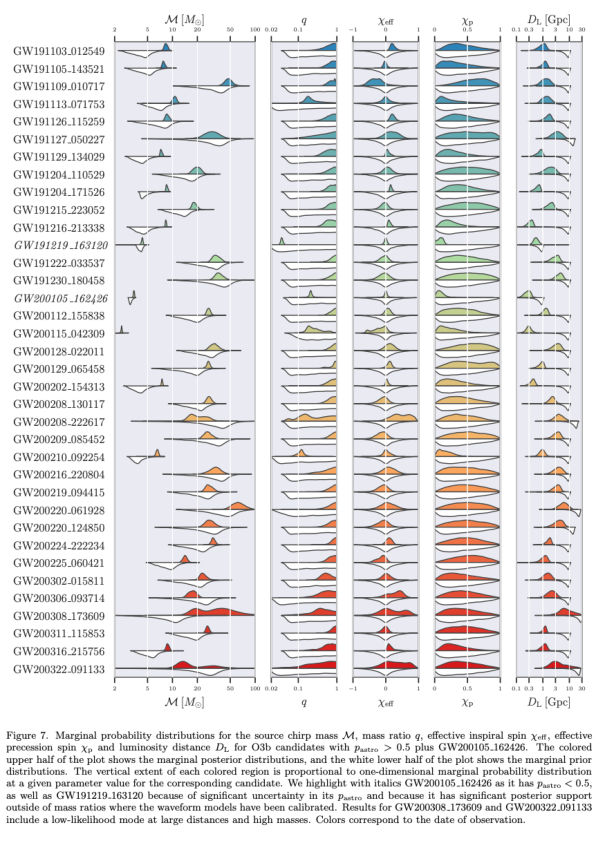

In [27]:
import fitz  # PyMuPDF
from IPython.display import Image, display
from PIL import Image as PILImage

pdf_path = 'C:\\Users\\Lenovo\\Desktop\\GW\\screenshot_fig7_GWTC3.pdf'

# 打开 PDF 文件
pdf_document = fitz.open(pdf_path)

# 选择要显示的页面（这里选择第一页）
page = pdf_document[0]

# 将页面转换为图像
pix = page.get_pixmap()

# 保存图像为临时文件
image_path = 'temp_page_image.png'
pil_image = PILImage.frombytes("RGB", [pix.width, pix.height], pix.samples)
pil_image.save(image_path)

# 在 Jupyter 中显示图像
display(Image(filename=image_path))

# 关闭 PDF 文件
pdf_document.close()


## Load libs

In [28]:
import h5py
from os import listdir
from os.path import join
from fnmatch import fnmatch

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
import os
# 设置命令行编码为UTF-8
os.system('chcp 65001')

# 数据需要从 https://zenodo.org/records/7997424 下载，注意：文件比较大。
# !ls -lht /home/GWTC3_PE_data_release/IGWN-GWTC3p0-v1-*cosmo.h5 | head

0

In [51]:
path = 'C:/Users/Lenovo/Desktop/GW'
!dir /B /O-D /TW "{path}\\*.*" | findstr /C:".h5" | more

IGWN-GWTC3p0-v2-GW200209_085452_PEDataRelease_mixed_nocosmo.h5
IGWN-GWTC3p0-v2-GW200316_215756_PEDataRelease_mixed_nocosmo.h5
IGWN-GWTC3p0-v2-GW200311_115853_PEDataRelease_mixed_nocosmo.h5
IGWN-GWTC3p0-v2-GW200322_091133_PEDataRelease_mixed_nocosmo.h5
IGWN-GWTC3p0-v2-GW200316_215756_PEDataRelease_mixed_cosmo.h5
IGWN-GWTC3p0-v2-GW200322_091133_PEDataRelease_mixed_cosmo.h5
IGWN-GWTC3p0-v2-GW200224_222234_PEDataRelease_mixed_nocosmo.h5
IGWN-GWTC3p0-v2-GW200308_173609_PEDataRelease_mixed_nocosmo.h5
IGWN-GWTC3p0-v2-GW200311_115853_PEDataRelease_mixed_cosmo.h5
IGWN-GWTC3p0-v2-GW200225_060421_PEDataRelease_mixed_nocosmo.h5
IGWN-GWTC3p0-v2-GW200306_093714_PEDataRelease_mixed_nocosmo.h5
IGWN-GWTC3p0-v2-GW200302_015811_PEDataRelease_mixed_nocosmo.h5
IGWN-GWTC3p0-v2-GW200308_173609_PEDataRelease_mixed_cosmo.h5
IGWN-GWTC3p0-v2-GW200306_093714_PEDataRelease_mixed_cosmo.h5
IGWN-GWTC3p0-v2-GW200220_124850_PEDataRelease_mixed_nocosmo.h5
IGWN-GWTC3p0-v2-GW200302_015811_PEDataRelease_mixed_cosmo.h5
IGWN

## Read data

In [55]:
# GW200224_222234
file_name = "C:/Users/Lenovo/Desktop/GW/IGWN-GWTC3p0-v2-GW191103_012549_PEDataRelease_mixed_nocosmo.h5"

In [56]:
with h5py.File(file_name, "r") as f:
    print("H5 data sets:")
    print(list(f)) # ['C01:IMRPhenomXPHM', 'C01:Mixed', 'C01:SEOBNRv4PHM', 'history', 'version']
    print(list(f['C01:Mixed'].keys()))
    print(f['C01:Mixed']['posterior_samples']) # 输出 posterior_sample  
    print(f['C01:IMRPhenomXPHM']['priors']['samples'])
    priors = pd.DataFrame(dict(f['C01:IMRPhenomXPHM']['priors']['samples']))
    posterior_samples = pd.DataFrame(f['C01:Mixed']['posterior_samples'][:])
    # 'C01:IMRPhenomXPHM' 和 'C01:Mixed' 这是啥数据

H5 data sets:
['C01:IMRPhenomXPHM', 'C01:Mixed', 'C01:SEOBNRv4PHM', 'history', 'version']
['approximant', 'calibration_envelope', 'config_file', 'description', 'injection_data', 'meta_data', 'posterior_samples', 'priors', 'psds', 'version']
<HDF5 dataset "posterior_samples": shape (57156,), type "|V480">
<HDF5 group "/C01:IMRPhenomXPHM/priors/samples" (111 members)>


- 查看数据

In [57]:
priors.shape, posterior_samples.shape

((5000, 111), (57156, 60))

In [58]:
posterior_samples.head()

,spin_1z,tilt_2,spin_2x,chirp_mass_source,spin_1y,phi_12,chirp_mass,luminosity_distance,a_2,symmetric_mass_ratio,...,mass_1,tilt_1_infinity_only_prec_avg,tilt_2_infinity_only_prec_avg,spin_1z_infinity_only_prec_avg,spin_2z_infinity_only_prec_avg,chi_eff_infinity_only_prec_avg,chi_p_infinity_only_prec_avg,cos_tilt_1_infinity_only_prec_avg,cos_tilt_2_infinity_only_prec_avg,psi_wrapped
0,0.501415,1.939675,0.085122,8.460959,0.240798,0.200714,9.949496,875.430431,0.546631,0.250000,...,11.439101,1.050063,1.526636,0.280576,0.024132,0.152467,0.544993,0.497516,0.044146,0.439413
1,0.277562,0.822210,-0.541661,7.885316,0.182834,1.808927,10.186251,1548.298032,0.747183,0.247519,...,12.943795,0.703078,0.767990,0.253882,0.537455,0.381544,0.413086,0.762856,0.719309,0.578435
2,0.390959,0.867945,0.258090,8.190077,0.279189,5.225261,10.089383,1191.793846,0.455702,0.205003,...,18.593680,1.123127,1.035389,0.416050,0.232496,0.363210,0.866439,0.432866,0.510192,2.933402
3,0.324585,1.515071,0.165453,8.664421,0.117398,2.982549,9.987503,749.189043,0.273691,0.249027,...,12.216884,0.876221,1.128125,0.234570,0.117237,0.179563,0.281578,0.640059,0.428354,2.714865
4,-0.008143,1.093195,0.836285,7.865797,0.007835,5.520825,9.972605,1403.569188,0.946634,0.247217,...,12.749580,1.886057,1.099174,-0.004070,0.430087,0.190104,0.662056,-0.310065,0.454332,0.227468


In [59]:
priors.head()

,a_1,a_2,azimuth,beta,chi_eff,chi_p,chi_p_2spin,chirp_mass,chirp_mass_source,comoving_distance,...,spin_2z,symmetric_mass_ratio,theta_jn,tilt_1,tilt_2,time_jitter,total_mass,total_mass_source,viewing_angle,zenith
0,0.460128,0.444882,2.145117,0.324791,-0.017186,0.454140,0.464483,9.182931,4.476853,3521.419417,...,0.184631,0.171393,0.929696,1.732292,1.142840,-0.000094,26.459724,12.899618,0.929696,1.561957
1,0.762177,0.548389,1.164424,0.268558,-0.024444,0.713720,0.733618,9.189942,4.096576,3960.727077,...,0.409501,0.230105,1.025151,1.929299,0.727658,0.000079,22.190011,9.891583,1.025151,2.240795
2,0.866523,0.216486,2.240282,0.233702,0.025298,0.866394,0.855379,9.056823,4.157597,3817.563299,...,0.040096,0.242119,2.381255,1.553527,1.384508,-0.000213,21.210889,9.737005,0.760338,1.618132
3,0.922355,0.158073,5.371943,0.879082,0.397972,0.821131,0.821225,10.108580,4.290369,4197.393634,...,0.039362,0.054737,1.485624,1.097904,1.319135,-0.000066,57.772571,24.520323,1.485624,0.802571
4,0.100252,0.662175,5.333537,0.043319,0.138574,0.087998,0.057907,7.554627,5.219752,1765.665966,...,0.487807,0.153953,1.383336,0.970762,0.742657,-0.000227,23.215623,16.040474,1.383336,0.980989


## Plot for an event

- 绘制 `chirp_mass_source` 特征的后验分布 vs 先验分布

In [60]:
# 作为后验的data，作为violin的上部
# 数据为posterior_samples
data = pd.DataFrame(columns=['event', 'violin', 'chirp_mass_source'])
data.chirp_mass_source = posterior_samples.chirp_mass_source
data.violin = 'upper'
data.event = 'GW200224_222234'

# 作为先验的data，作为violin的下部
# 数据为priors
data_prior = pd.DataFrame(columns=['event', 'violin', 'chirp_mass_source'])
data_prior.chirp_mass_source = priors.chirp_mass_source
data_prior.violin = 'bottom'
data_prior.event = 'GW200224_222234'

# 数据组合
data = pd.concat([data, data_prior])

In [61]:
data

,event,violin,chirp_mass_source
0,GW200224_222234,upper,8.460959
1,GW200224_222234,upper,7.885316
2,GW200224_222234,upper,8.190077
3,GW200224_222234,upper,8.664421
4,GW200224_222234,upper,7.865797
...,...,...,...
4995,GW200224_222234,bottom,3.541520
4996,GW200224_222234,bottom,4.756211
4997,GW200224_222234,bottom,6.044759
4998,GW200224_222234,bottom,3.223157


<Axes: xlabel='chirp_mass_source', ylabel='event'>

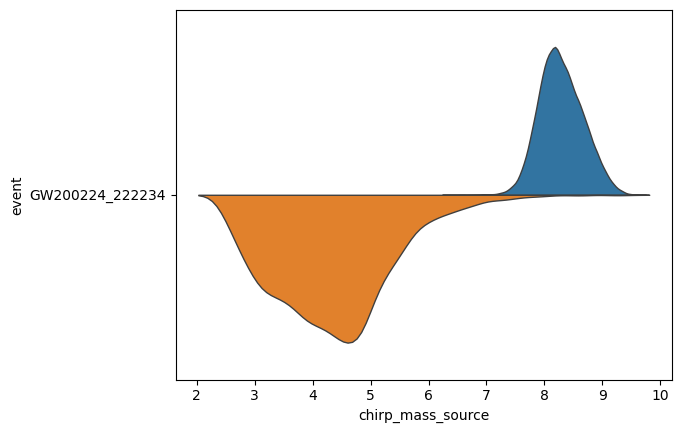

In [79]:
# sns.violinplot(x='chirp_mass_source',y='event',data=data,
#               density_norm='width',inner=None,split=True,legend=False,
#                linewidth=1
#               )
#               #  orient="h" ,hue='violin'

# # 一般画violin图
# sns.violinplot(x='chirp_mass_source',y='event',data=data)

# # 在不分两部分的 
# sns.violinplot(x='chirp_mass_source', y='event', data=data, split=True, legend=False)

# 第二个小提琴图
sns.violinplot(x='chirp_mass_source', y='event', data=data, orient='h', hue='violin',
               density_norm='width', inner=None, split=True, legend=False,
               linewidth=1)
               # split=True 画在同一个图上


In [80]:
data.groupby(['event', 'violin']).count()

chirp_mass_source
event           violin                   
GW200224_222234 bottom               5000
                upper               57156

## Plot for multiple events

- 对所有 events 的 `chirp_mass_source` 特征读取其后验分布 vs 先验分布

In [87]:
address = 'GWTC3_PE_data_release/'
listdir(address)
event_file = sorted([(file.split('_PEDataRelease')[0].split('-')[3], file)
                     for file in listdir(address)
                     if fnmatch(file, 'IGWN-GWTC3p0-v2-*_cosmo.h5')])
event_file
# 采用列表推导式，循环，如果match上文件名就和

[('GW191103_012549',
  'IGWN-GWTC3p0-v2-GW191103_012549_PEDataRelease_mixed_cosmo.h5'),
 ('GW191105_143521',
  'IGWN-GWTC3p0-v2-GW191105_143521_PEDataRelease_mixed_cosmo.h5'),
 ('GW191109_010717',
  'IGWN-GWTC3p0-v2-GW191109_010717_PEDataRelease_mixed_cosmo.h5'),
 ('GW191113_071753',
  'IGWN-GWTC3p0-v2-GW191113_071753_PEDataRelease_mixed_cosmo.h5'),
 ('GW191126_115259',
  'IGWN-GWTC3p0-v2-GW191126_115259_PEDataRelease_mixed_cosmo.h5'),
 ('GW191127_050227',
  'IGWN-GWTC3p0-v2-GW191127_050227_PEDataRelease_mixed_cosmo.h5'),
 ('GW191129_134029',
  'IGWN-GWTC3p0-v2-GW191129_134029_PEDataRelease_mixed_cosmo.h5'),
 ('GW191204_110529',
  'IGWN-GWTC3p0-v2-GW191204_110529_PEDataRelease_mixed_cosmo.h5'),
 ('GW191204_171526',
  'IGWN-GWTC3p0-v2-GW191204_171526_PEDataRelease_mixed_cosmo.h5'),
 ('GW191215_223052',
  'IGWN-GWTC3p0-v2-GW191215_223052_PEDataRelease_mixed_cosmo.h5'),
 ('GW191216_213338',
  'IGWN-GWTC3p0-v2-GW191216_213338_PEDataRelease_mixed_cosmo.h5'),
 ('GW191219_163120',
  'IGWN-GWT

In [88]:
df_list = []
for vi, (ename, file_name) in enumerate(event_file):
    # 遍历所有的数据
    # 通过h5py将所有数据读出['priors']['samples']
    with h5py.File(join(address, file_name), "r") as f:
        priors = pd.DataFrame(dict(f['C01:IMRPhenomXPHM'
                                     if ename not in ['GW191219_163120', 'GW200105_162426', 'GW200115_042309']
                                     else 'C01:IMRPhenomXPHM:HighSpin']['priors']['samples']))
        posterior_samples = pd.DataFrame(f['C01:Mixed']['posterior_samples'][:])

    # 在读出先验数据和后验数据之后，对数据进行增添标签
    # 一个标签是violin，另一个标签是ename
    df = pd.DataFrame({
        'chirp_mass_source': posterior_samples['chirp_mass_source'],
        'violin': 'upper',
        'event': ename,
    })
    df_list.append(df)
    df_prior = pd.DataFrame({
        'chirp_mass_source': priors['chirp_mass_source'],
        'violin': 'bottom',
        'event': ename,
    })
    df_list.append(df_prior)
data = pd.concat(df_list)

In [90]:
data

,chirp_mass_source,violin,event
0,8.929873,upper,GW191103_012549
1,8.074338,upper,GW191103_012549
2,8.273513,upper,GW191103_012549
3,8.369736,upper,GW191103_012549
4,8.441250,upper,GW191103_012549
...,...,...,...
4995,38.664199,bottom,GW200322_091133
4996,36.743287,bottom,GW200322_091133
4997,6.229935,bottom,GW200322_091133
4998,29.972274,bottom,GW200322_091133


In [91]:
data.groupby(['event', 'violin']).count()

chirp_mass_source
event           violin                   
GW191103_012549 bottom               5000
                upper                9859
GW191105_143521 bottom               5000
                upper               16861
GW191109_010717 bottom               5000
...                                   ...
GW200311_115853 upper               20276
GW200316_215756 bottom               5000
                upper              129267
GW200322_091133 bottom               5000
                upper                  69

[72 rows x 1 columns]

<Axes: xlabel='chirp_mass_source', ylabel='event'>

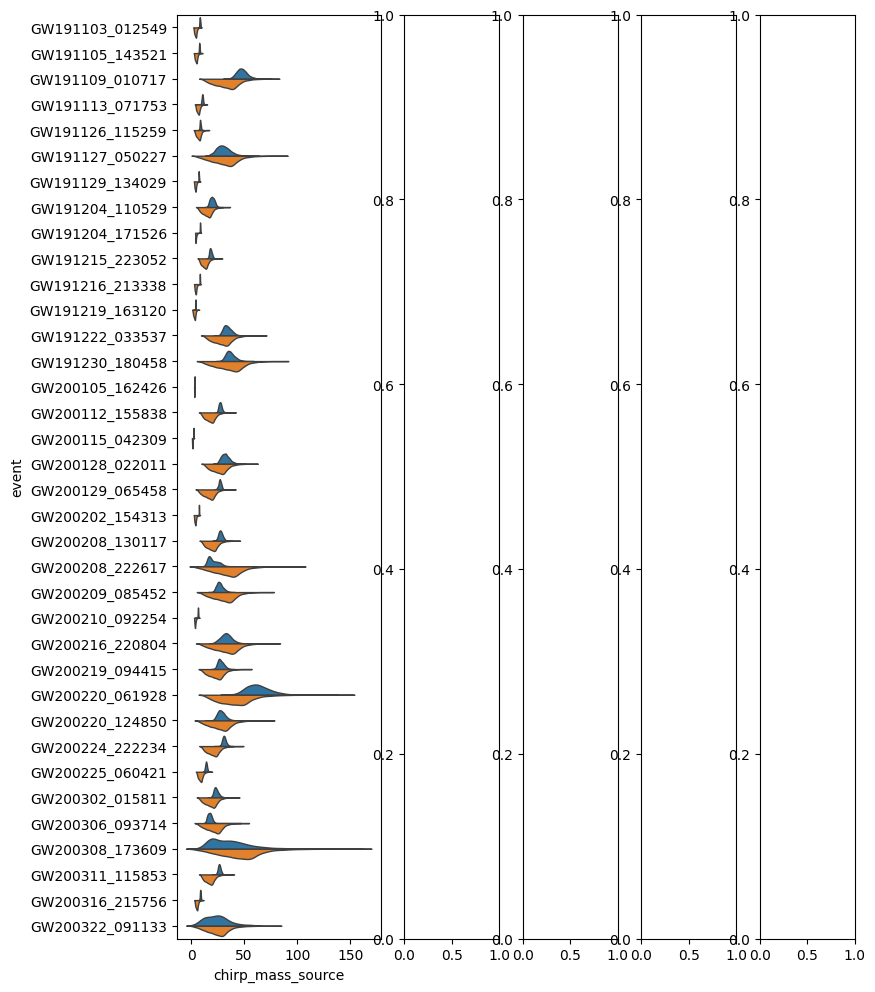

In [25]:
# 首先构建1行5列的画布
# 定义每个子图的比例
fig,ax = plt.subplots(1, 5, figsize=(8.75,12), sharey=False,
                      gridspec_kw = {'wspace':0.2, 'width_ratios':[1.5, 0.7, 0.7, 0.7, 0.7]})

# 纵坐标是'event'，以及对应上下分别是先验后验数据
sns.violinplot(x='chirp_mass_source',y='event',data=data,hue='violin',
               orient="h",density_norm='width',inner=None,split=True,legend=False,
               ax=ax[0],
               linewidth=1
              )
            # 在第0号的列上画处相应的图

- 修改一下坐标轴的标度等

In [94]:
# 后面需要更改的：
# 首先是纵坐标的数目
# 增加题注
# 对数据进行求对数
address = 'GWTC3_PE_data_release/'
# 重新读取出数据
event_file = sorted([(file.split('_PEDataRelease')[0].split('-')[3], file)
                     for file in listdir(address)
                     if fnmatch(file, 'IGWN-GWTC3p0-v2-*_cosmo.h5')])

df_list = []


for vi, (ename, file_name) in enumerate(event_file):

    with h5py.File(join(address, file_name), "r") as f:
        priors = pd.DataFrame(dict(f['C01:IMRPhenomXPHM'
                                     if ename not in ['GW191219_163120', 'GW200105_162426', 'GW200115_042309']
                                     else 'C01:IMRPhenomXPHM:HighSpin']['priors']['samples']))
        posterior_samples = pd.DataFrame(f['C01:Mixed']['posterior_samples'][:])

        
    df = pd.DataFrame({ # 取对数
        'chirp_mass_source': np.log10(posterior_samples['chirp_mass_source']),
        'violin': 'upper',
        'event': ename,
    })
    df_list.append(df)
    df_prior = pd.DataFrame({ # 取对数
        'chirp_mass_source': np.log10(priors['chirp_mass_source']),
        'violin': 'bottom',
        'event': ename,
    })
    df_list.append(df_prior)
data = pd.concat(df_list)

In [95]:
event_file

[('GW191103_012549',
  'IGWN-GWTC3p0-v2-GW191103_012549_PEDataRelease_mixed_cosmo.h5'),
 ('GW191105_143521',
  'IGWN-GWTC3p0-v2-GW191105_143521_PEDataRelease_mixed_cosmo.h5'),
 ('GW191109_010717',
  'IGWN-GWTC3p0-v2-GW191109_010717_PEDataRelease_mixed_cosmo.h5'),
 ('GW191113_071753',
  'IGWN-GWTC3p0-v2-GW191113_071753_PEDataRelease_mixed_cosmo.h5'),
 ('GW191126_115259',
  'IGWN-GWTC3p0-v2-GW191126_115259_PEDataRelease_mixed_cosmo.h5'),
 ('GW191127_050227',
  'IGWN-GWTC3p0-v2-GW191127_050227_PEDataRelease_mixed_cosmo.h5'),
 ('GW191129_134029',
  'IGWN-GWTC3p0-v2-GW191129_134029_PEDataRelease_mixed_cosmo.h5'),
 ('GW191204_110529',
  'IGWN-GWTC3p0-v2-GW191204_110529_PEDataRelease_mixed_cosmo.h5'),
 ('GW191204_171526',
  'IGWN-GWTC3p0-v2-GW191204_171526_PEDataRelease_mixed_cosmo.h5'),
 ('GW191215_223052',
  'IGWN-GWTC3p0-v2-GW191215_223052_PEDataRelease_mixed_cosmo.h5'),
 ('GW191216_213338',
  'IGWN-GWTC3p0-v2-GW191216_213338_PEDataRelease_mixed_cosmo.h5'),
 ('GW191219_163120',
  'IGWN-GWT

In [132]:
sns.color_palette("Spectral_r", 10).as_hex()
sns.set()

# 获取颜色参数
colors = sns.color_palette("Spectral_r", len(event_file)).as_hex()

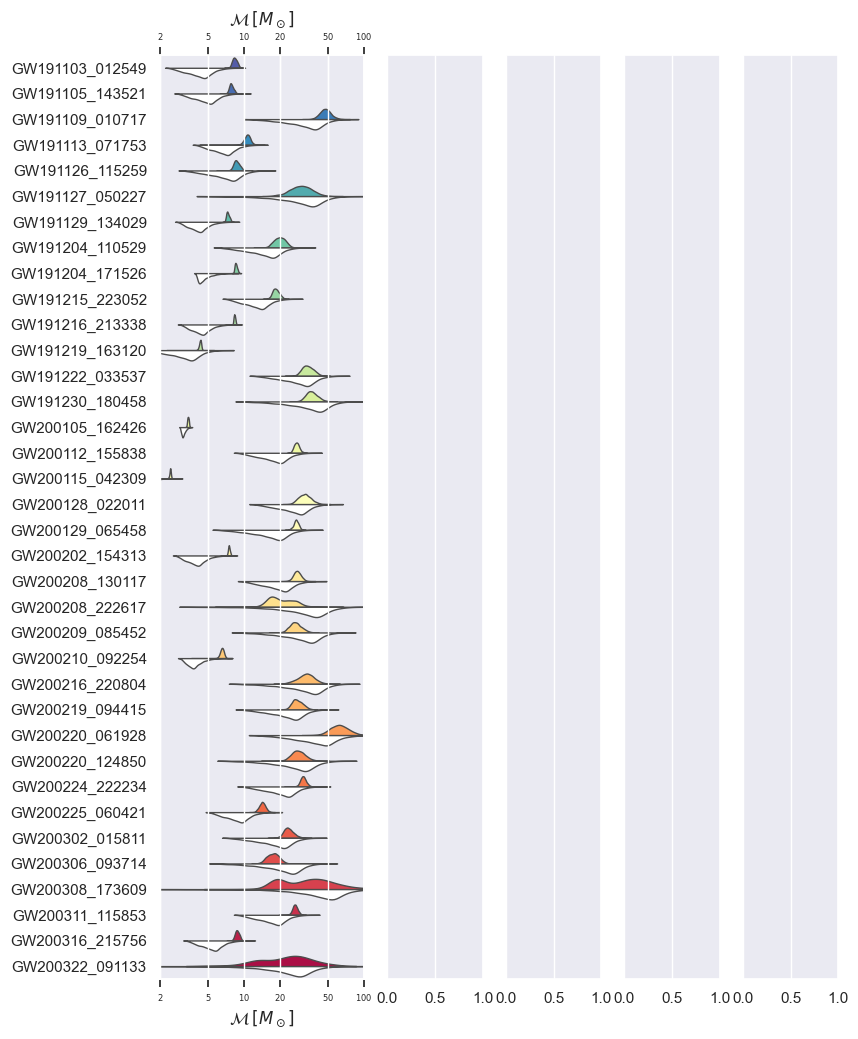

In [134]:
# 在取log的基础上，然后进行绘制图
# 画布和之间一样
fig,ax = plt.subplots(1, 5,figsize=(8.75,12),sharey=False,
                      gridspec_kw = {'wspace':0.2, 'width_ratios':[1.5, 0.7, 0.7, 0.7, 0.7]})

# 如果还是之前这样绘制
sns.violinplot(x='chirp_mass_source',y='event',data=data,hue='violin',
               orient="h",density_norm='width',inner=None,split=True,legend=False,
               ax=ax[0],
               linewidth=1
              )
# 会发现上下具有横坐标标题
# set x labels
ax[0].set_xlabel(r'$'+r'\mathcal{{M}}\:[M_\odot]'+r'$',fontsize=12)
# set top x label
ax_copy = ax[0].twiny()
ax_copy.set_xlabel(r'$'+r'\mathcal{{M}}\:[M_\odot]'+r'$',fontsize=12)

# 设定坐标的边界
ax[0].set_xlim(np.log10([2,100]))
ax_copy.set_xlim(np.log10([2,100]))
# 删掉 `events`
for vi in range(0,5):
    ax[vi].set_ylabel('')
    if vi != 0:
        ax[vi].set_yticks([])


# 定义坐标
tick_map = {
    'chirp_mass_source':[2,5,10,20,50,100],
}
# set tick labels
ax[0].set_xticks(np.log10(tick_map['chirp_mass_source']))
ax[0].set_xticklabels([f'${lab}$' for lab in tick_map['chirp_mass_source']], fontsize=6)

ax_copy.set_xticks(np.log10(tick_map['chirp_mass_source']))
ax_copy.set_xticklabels([f'${lab}$' for lab in tick_map['chirp_mass_source']], fontsize=6)

# loop over violins to add hatching and shading where required
violin_pairs = []
for v, violin_half in enumerate(ax[0].get_children()):
    if v % 2 == 0: # Upper violin
        violin_pairs.append([])
    violin_pairs[-1].append(violin_half)
for pair, (ev, _), col in zip(violin_pairs, event_file, colors): # 给每个 event 指定颜色
    # print(ev)
    pair[0].set_facecolor(col)        # 为 posterior 指定颜色
    pair[1].set_facecolor('#FFFFFF')  # 为 prior 白色

## Plot for multiple params

In [105]:
address = 'GWTC3_PE_data_release/'
event_file = sorted([(file.split('_PEDataRelease')[0].split('-')[3], file)
                     for file in listdir(address)
                     if fnmatch(file, 'IGWN-GWTC3p0-v2-*_cosmo.h5')])

# 指定五个参数维度
vars = ['chirp_mass_source', 'mass_ratio', 'chi_eff', 'chi_p', 'luminosity_distance']
df_list = []

for vi, (ename, file_name) in enumerate(event_file):

    with h5py.File(join(address, file_name), "r") as f:
        priors = pd.DataFrame(dict(f['C01:IMRPhenomXPHM'
                                     if ename not in ['GW191219_163120', 'GW200105_162426', 'GW200115_042309']
                                     else 'C01:IMRPhenomXPHM:HighSpin']['priors']['samples']))
        posterior_samples = pd.DataFrame(f['C01:Mixed']['posterior_samples'][:])
    
        
    df = pd.DataFrame({
        **{  # 对 chirp_mass_source, mass_ratio 以及 luminosity_distance 特征在scale上进行处理
            var: np.log10(posterior_samples[var] / (1000 if var=='luminosity_distance' else 1))
            if 'mass' in var or 'distance' in var
            else posterior_samples[var] for var in vars
        },
        'violin': 'upper',
        'event': ename,
    })
    df_list.append(df)
    df_prior = pd.DataFrame({
        **{
            var: np.log10(priors[var] / (1000 if var=='luminosity_distance' else 1))
            if 'mass' in var or 'distance' in var
            else priors[var] for var in vars
        },
        'violin': 'bottom',
        'event': ename,
    })
    df_list.append(df_prior)
data = pd.concat(df_list)

In [29]:
data

,chirp_mass_source,mass_ratio,chi_eff,chi_p,luminosity_distance,violin,event
0,0.950845,-0.013426,0.124681,0.398897,-0.288171,upper,GW191103_012549
1,0.907107,-0.028997,0.210005,0.232888,0.091748,upper,GW191103_012549
2,0.917690,-0.082065,0.191831,0.381942,0.032501,upper,GW191103_012549
3,0.922712,-0.353322,0.285288,0.516188,0.004128,upper,GW191103_012549
4,0.926407,-0.233709,0.228022,0.338341,-0.055944,upper,GW191103_012549
...,...,...,...,...,...,...,...
4995,1.587309,-0.978478,0.808248,0.074668,1.194721,bottom,GW200322_091133
4996,1.565178,-0.550964,0.195930,0.293281,1.211398,bottom,GW200322_091133
4997,0.794484,-0.258141,0.201115,0.305499,1.227825,bottom,GW200322_091133
4998,1.476720,-0.808768,-0.019374,0.188534,1.387833,bottom,GW200322_091133


In [106]:
data.groupby(['event', 'violin']).count()

chirp_mass_source  mass_ratio  chi_eff   chi_p  \
event           violin                                                   
GW191103_012549 bottom               5000        5000     5000    5000   
                upper                9859        9859     9859    9859   
GW191105_143521 bottom               5000        5000     5000    5000   
                upper               16861       16861    16861   16861   
GW191109_010717 bottom               5000        5000     5000    5000   
...                                   ...         ...      ...     ...   
GW200311_115853 upper               20276       20276    20276   20276   
GW200316_215756 bottom               5000        5000     5000    5000   
                upper              129267      129267   129267  129267   
GW200322_091133 bottom               5000        5000     5000    5000   
                upper                  69          69       69      69   

                        luminosity_distance  
event           violin                       
GW191103_012549 bottom                 5000  
                upper                  9859  
GW191105_143521 bottom                 5000  
                upper                 16861  
GW191109_010717 bottom                 5000  
...                                     ...  
GW200311_115853 upper                 20276  
GW200316_215756 bottom                 5000  
                upper                129267  
GW200322_091133 bottom                 5000  
                upper                    69  

[72 rows x 5 columns]

> Bug: GW200322_091133 posterior?

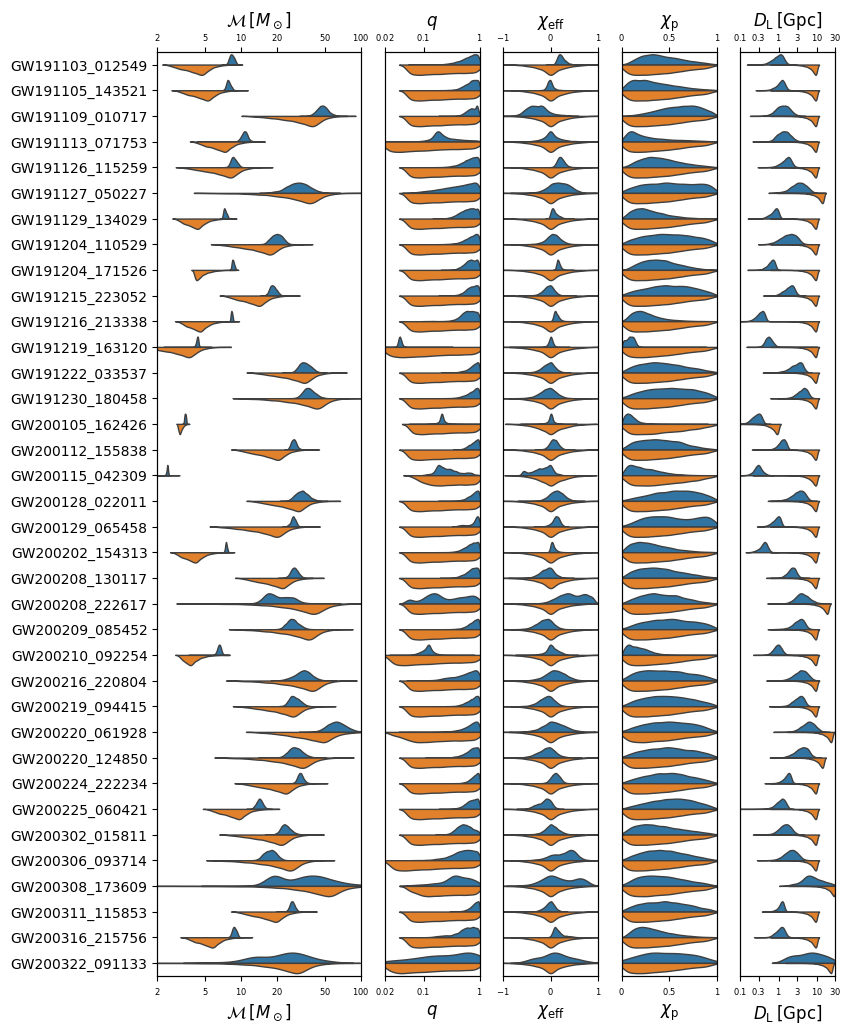

In [108]:
fig,ax = plt.subplots(1, len(vars), figsize=(8.75,12),sharey=False,
                      gridspec_kw = {'wspace':0.2, 'width_ratios':[1.5, 0.7, 0.7, 0.7, 0.7]})
xlim = [2,100,0.02,1,-1,1,0,1,0.1,30]

tick_map = {
    'chirp_mass_source':[2,5,10,20,50,100],
    'mass_ratio': [0.02, 0.1, 1],
    'chi_eff': [-1,0,1],
    'chi_p': [0, 0.5, 1],
    'luminosity_distance': [0.1,0.3,1,3,10,30]
}

column_name2tex_name = {
        'chirp_mass_source':r'\mathcal{{M}}\:[M_\odot]',
        'mass_ratio':r'q',
        'chi_eff':r'\chi_{{\rm eff}}',
        'chi_p':r'\chi_{{\rm p}}',
        'luminosity_distance':r'D_{\rm L}\:[{\rm Gpc}]',
}

for vi, var in enumerate(vars):
    sns_axi = sns.violinplot(x=var, y='event',data=data,hue='violin',
                             orient="h",density_norm='width',inner=None,split=True,legend=False,
                             ax=ax[vi],
                             linewidth=1
                            )

    # set x labels
    ax[vi].set_xlabel(r'$'+column_name2tex_name[var]+r'$',fontsize=12)
    # set top x label
    ax_copy = ax[vi].twiny()
    ax_copy.set_xlabel(r'$'+column_name2tex_name[var]+r'$',fontsize=12)
    
    # 设定坐标的边界
    if 'mass' in var or 'distance' in var:
        ax[vi].set_xlim(np.log10(xlim[2*vi:2*vi+2]))
        ax_copy.set_xlim(np.log10(xlim[2*vi:2*vi+2]))
    else:
        ax[vi].set_xlim(xlim[2*vi:2*vi+2])
        ax_copy.set_xlim(xlim[2*vi:2*vi+2])

    # 删掉 `events`        
    ax[vi].set_ylabel('')
    if vi:    
        ax[vi].yaxis.set_visible(False)

    # set tick labels
    if 'mass' in var or 'distance' in var:
        ax[vi].set_xticks(np.log10(tick_map[var]))
        ax_copy.set_xticks(np.log10(tick_map[var]))
        sns_axi.set_xticklabels([f'${lab}$' for lab in tick_map[var]], fontsize=6)
        ax_copy.set_xticklabels([f'${lab}$' for lab in tick_map[var]], fontsize=6)
    else:
        sns_axi.set_xticks(tick_map[var])
        ax_copy.set_xticks(tick_map[var])
        sns_axi.set_xticklabels([f'${lab}$' for lab in tick_map[var]], fontsize=6)
        ax_copy.set_xticklabels([f'${lab}$' for lab in tick_map[var]], fontsize=6)

## Stylize your plot

In [127]:
sns.color_palette("Spectral_r", 10).as_hex()

['#3682ba',
 '#5cb7aa',
 '#97d5a4',
 '#d1ed9c',
 '#f4faad',
 '#fff1a8',
 '#fece7c',
 '#fa9b58',
 '#ee6445',
 '#d0384e']

In [128]:
sns.set()

CPU times: total: 8 s
Wall time: 23.5 s


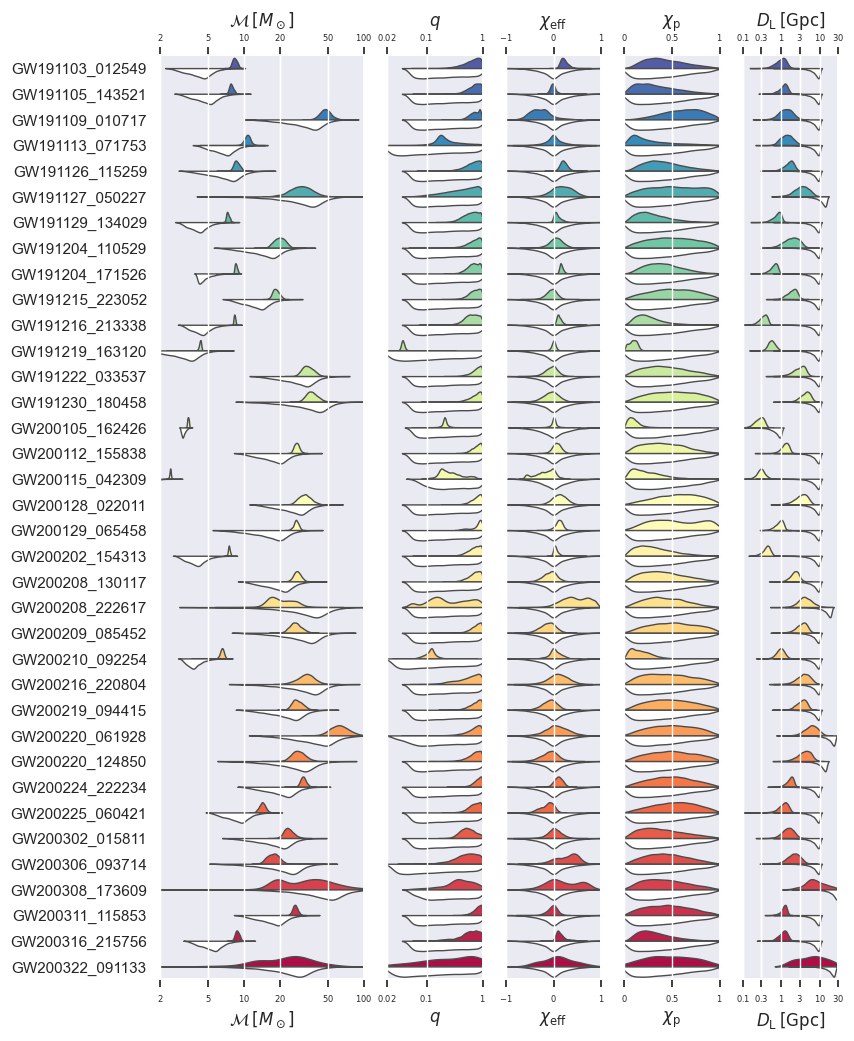

In [129]:
%%time
fig,ax = plt.subplots(1, len(vars), figsize=(8.75,12),sharey=False,
                      gridspec_kw = {'wspace':0.2, 'width_ratios':[1.5, 0.7, 0.7, 0.7, 0.7]})
xlim = [2,100,0.02,1,-1,1,0,1,0.1,30]

tick_map = {
    'chirp_mass_source':[2,5,10,20,50,100],
    'mass_ratio': [0.02, 0.1, 1],
    'chi_eff': [-1,0,1],
    'chi_p': [0, 0.5, 1],
    'luminosity_distance': [0.1,0.3,1,3,10,30]
}

column_name2tex_name = {
        'chirp_mass_source':r'\mathcal{{M}}\:[M_\odot]',
        'mass_ratio':r'q',
        'chi_eff':r'\chi_{{\rm eff}}',
        'chi_p':r'\chi_{{\rm p}}',
        'luminosity_distance':r'D_{\rm L}\:[{\rm Gpc}]',
        }

# 获取颜色参数
colors = sns.color_palette("Spectral_r", len(event_file)).as_hex()

for vi, var in enumerate(vars):
    sns_axi = sns.violinplot(x=var, y='event',data=data,hue='violin',
                             orient="h",density_norm='width',inner=None,split=True,legend=False,
                             ax=ax[vi],#palette=colors,
                             linewidth=1
                            )

    # loop over violins to add hatching and shading where required
    violin_pairs = []
    for v, violin_half in enumerate(sns_axi.get_children()):
        if v % 2 == 0: # Upper violin
            violin_pairs.append([])
        violin_pairs[-1].append(violin_half)
    for pair, (ev, _), col in zip(violin_pairs, event_file, colors): # 给每个 event 指定颜色
        # print(ev)
        pair[0].set_facecolor(col)        # 为 posterior 指定颜色
        pair[1].set_facecolor('#FFFFFF')  # 为 prior 白色

    # set x labels
    ax[vi].set_xlabel(r'$'+column_name2tex_name[var]+r'$',fontsize=12)
    # set top x label
    ax_copy = ax[vi].twiny()
    ax_copy.set_xlabel(r'$'+column_name2tex_name[var]+r'$',fontsize=12)
    
    # 设定坐标的边界
    if 'mass' in var or 'distance' in var:
        ax[vi].set_xlim(np.log10(xlim[2*vi:2*vi+2]))
        ax_copy.set_xlim(np.log10(xlim[2*vi:2*vi+2]))
    else:
        ax[vi].set_xlim(xlim[2*vi:2*vi+2])
        
        
        ax_copy.set_xlim(xlim[2*vi:2*vi+2])

    # 删掉 `events`        
    ax[vi].set_ylabel('')
    if vi:    
        ax[vi].yaxis.set_visible(False)

    # set tick labels
    if 'mass' in var or 'distance' in var:
        ax[vi].set_xticks(np.log10(tick_map[var]))
        ax_copy.set_xticks(np.log10(tick_map[var]))
        sns_axi.set_xticklabels([f'${lab}$' for lab in tick_map[var]], fontsize=6)
        ax_copy.set_xticklabels([f'${lab}$' for lab in tick_map[var]], fontsize=6)
    else:
        sns_axi.set_xticks(tick_map[var])
        ax_copy.set_xticks(tick_map[var])
        sns_axi.set_xticklabels([f'${lab}$' for lab in tick_map[var]], fontsize=6)
        ax_copy.set_xticklabels([f'${lab}$' for lab in tick_map[var]], fontsize=6)

> **Disclaimer**: This notebook uses publicly available open-source data for educational purposes only. The code used for plotting is based on personal understanding and the results of the plots should not be taken as a substitute for the figures in the above paper. This is hereby declared.